In [275]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [276]:
df = pd.read_csv('DATASET.csv')

C:\Users\macka\AppData\Local\Temp\ipykernel_38316\1563159184.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('DATASET.csv')


In [277]:
df.head()

,Year,Jurisdiction,Category,Type,Classification,Total type,Stream,Management,Fate,Tonnes,Core or non-core,Sub-stream,Cat. order,Cat. no.,Type order,Type no.,
0,2020-2021,ACT,Biosolids,Biosolids,Type,NaN,C&I,Other disposal,Disposal,"20,186",Core waste,03 C&I core,03 Organics,C3,14 Biosolids,T14,NaN
1,2020-2021,ACT,Biosolids,Biosolids,Type,NaN,C&I,Recycling,Recycling,0,Core waste,03 C&I core,03 Organics,C3,14 Biosolids,T14,NaN
2,2020-2021,ACT,Biosolids,Biosolids,Type,NaN,Total,Other disposal,Disposal,"20,186",Core waste,09 Total,03 Organics,C3,14 Biosolids,T14,NaN
3,2020-2021,ACT,Biosolids,Biosolids,Type,NaN,Total,Recycling,Recycling,0,Core waste,09 Total,03 Organics,C3,14 Biosolids,T14,NaN
4,2020-2021,ACT,Biosolids,NaN,Category,NaN,C&I,Other disposal,Disposal,"20,186",Core waste,03 C&I core,03 Organics,C3,NaN,NaN,NaN


In [278]:
df.shape

(71496, 17)

In [279]:
df = df.drop_duplicates()

In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71424 entries, 0 to 71495
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Year              71424 non-null  object
 1   Jurisdiction      71424 non-null  object
 2   Category          71424 non-null  object
 3   Type              54156 non-null  object
 4   Classification    71424 non-null  object
 5   Total type        4901 non-null   object
 6   Stream            71424 non-null  object
 7   Management        71424 non-null  object
 8   Fate              71424 non-null  object
 9   Tonnes            71424 non-null  object
 10  Core or non-core  71424 non-null  object
 11  Sub-stream        71424 non-null  object
 12  Cat. order        71424 non-null  object
 13  Cat. no.          71424 non-null  object
 14  Type order        54162 non-null  object
 15  Type no.          54162 non-null  object
 16                    8608 non-null   object
dtypes: object(17

In [281]:
unique_categories = df['Category'].unique()
unique_types = df['Type'].unique()
unique_years = df['Year'].unique()

In [282]:
df = df.drop('Total type', axis=1)
df = df[df['Jurisdiction'] != 'Australia']

In [283]:
df['Tonnes'] = df['Tonnes'].str.replace(',', '')
df['Tonnes'] = df['Tonnes'].astype(int)

In [284]:
agg_sum = df.groupby(['Jurisdiction'])['Tonnes'].sum()
agg_sum

Jurisdiction
ACT      51689966
NSW    2116305322
NT      298870967
Qld    1507767236
SA      649713662
Tas      89015273
Vic    1090419793
WA     2974201365
Name: Tonnes, dtype: int64

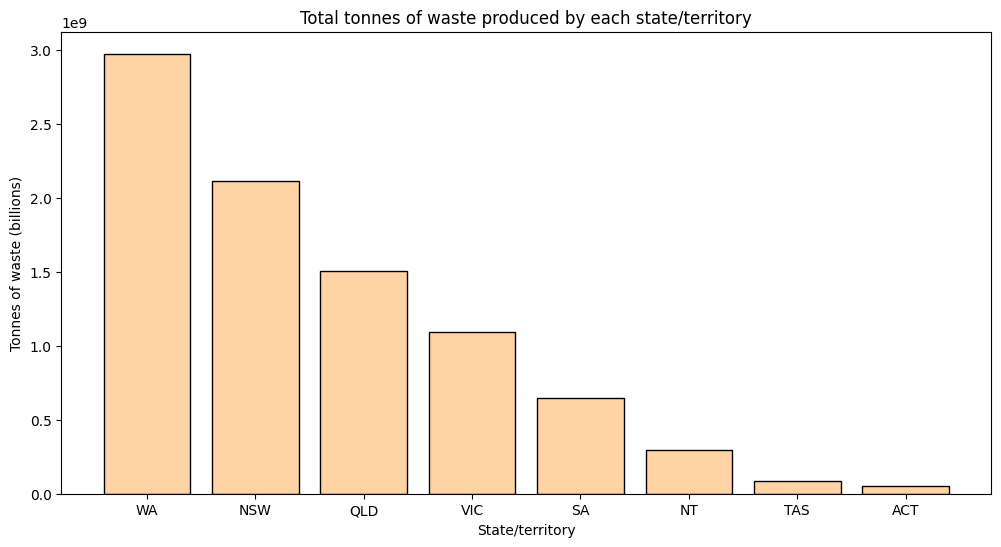

In [285]:
state_tonne_sums = []
state_names = ['WA', 'NSW', 'QLD', 'VIC', 'SA', 'NT', 'TAS', 'ACT']

for i in range(len(agg_sum)):
    state_tonne_sums.append(agg_sum[i])

state_tonne_sums.sort(reverse = True)
plt.figure(figsize=(12, 6))
plt.bar(state_names, state_tonne_sums, color = '#FFD3A3', edgecolor='black', linewidth=1)
plt.xlabel("State/territory")
plt.ylabel("Tonnes of waste (billions)")
plt.title("Total tonnes of waste produced by each state/territory")
plt.show()

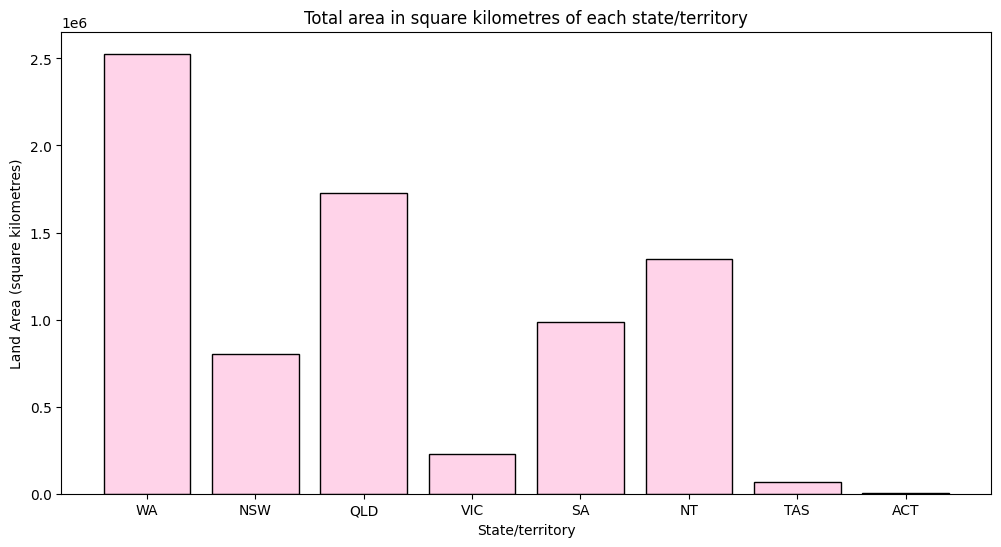

In [286]:
state_areas = [2527013, 801150, 1729742, 227444, 984321, 1347791, 68401, 2358]
plt.figure(figsize=(12, 6))
plt.bar(state_names, state_areas, color = '#FFD3E9', edgecolor='black', linewidth=1)
plt.xlabel("State/territory")
plt.ylabel("Land Area (square kilometres)")
plt.title("Total area in square kilometres of each state/territory")
plt.show()

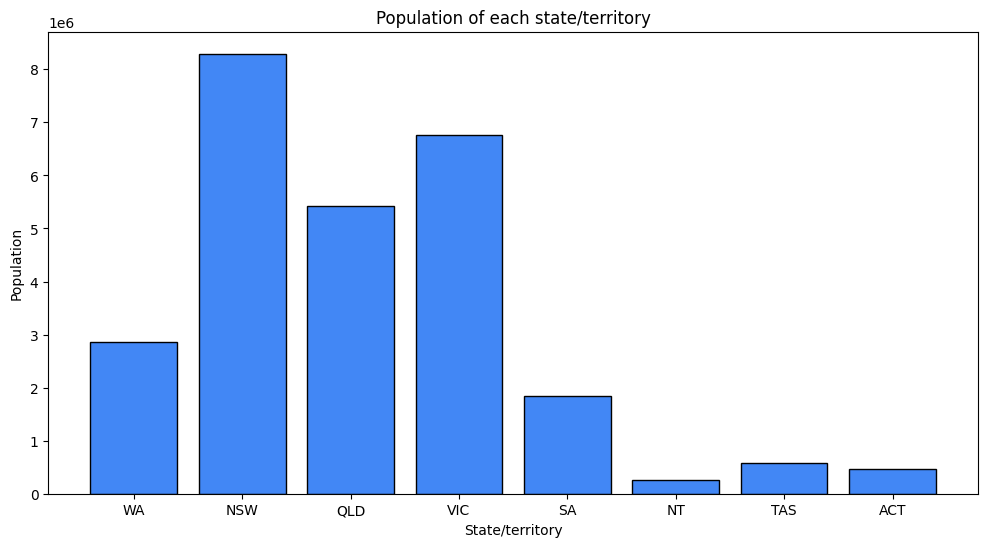

In [287]:
state_populations = [2855600, 8294000, 5418500, 6766600, 1844600, 251700, 572700, 464600]
plt.figure(figsize=(12, 6))
plt.bar(state_names, state_populations, color = '#4287f5', edgecolor='black', linewidth=1)
plt.xlabel("State/territory")
plt.ylabel("Population")
plt.title("Population of each state/territory")
plt.show()

In [288]:
import statistics
mean_area = statistics.mean(state_areas)
std_dev_area = statistics.stdev(state_areas)

mean_pop = statistics.mean(state_populations)
std_dev_pop = statistics.stdev(state_populations)

state_area_normal = []
for i in range(len(state_areas)):
    state_area_normal.append((state_areas[i]-mean_area)/std_dev_area)
state_area_normal

state_pop_normal = []
for i in range(len(state_populations)):
    state_pop_normal.append((state_populations[i]-mean_pop)/std_dev_pop)
state_pop_normal

states_areas_plus_pop = []
for i in range(len(state_areas)):
    states_areas_plus_pop.append(state_area_normal[i] + state_pop_normal[i])
states_areas_plus_pop

[1.6262799827636463,
 1.4125452235423441,
 1.5437172419402976,
 0.2755587285334784,
 -0.44153188664585113,
 -0.539560311781945,
 -1.8838846609482958,
 -1.9931243174036744]

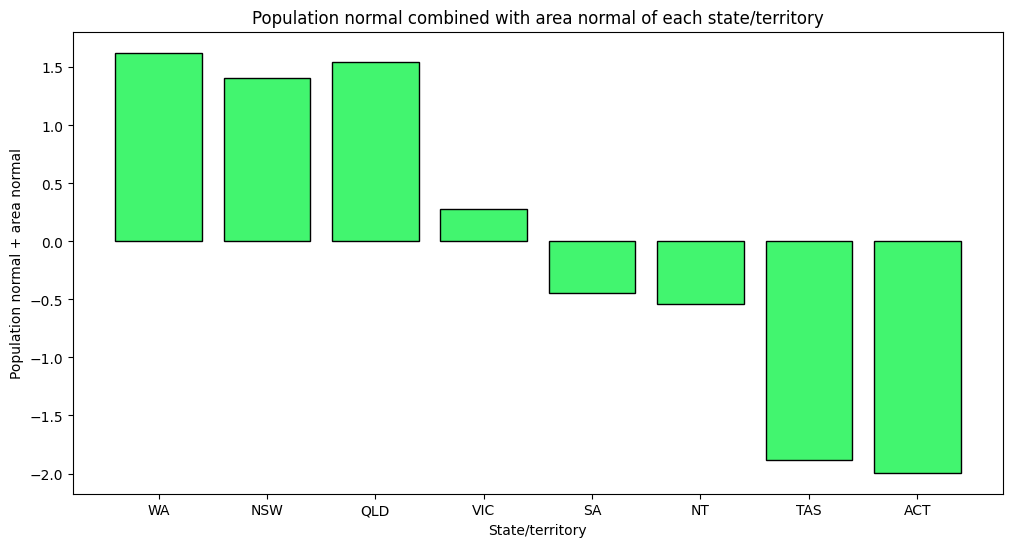

In [289]:
plt.figure(figsize=(12, 6))
plt.bar(state_names, states_areas_plus_pop, color = '#42f56f', edgecolor='black', linewidth=1)
plt.xlabel("State/territory")
plt.ylabel("Population normal + area normal")
plt.title("Population normal combined with area normal of each state/territory")
plt.show()

In [290]:
df_australia = df[df['Jurisdiction'] == 'Australia']
state_counts = df['Jurisdiction'].value_counts()
print("Number of entries for each state/territory")
state_counts

Number of entries for each state/territory


SA     9589
WA     9375
Vic    9114
ACT    8813
NSW    8807
Qld    8602
Tas    8426
NT     8366
Name: Jurisdiction, dtype: int64

In [291]:
yearly_groups = df.groupby(['Year'])['Tonnes'].sum()

In [292]:
yearly_groups

Year
2006-2007     320294231
2007-2008      34228904
2008-2009     329572918
2009-2010     334300181
2010-2011     332293640
2011-2012      31631979
2012-2013      35502939
2013-2014     335826397
2014-2015     353673768
2015-2016     364789916
2016-2017     379442636
2017-2018     409381478
2018-2019    2193646624
2019-2020     417288109
2020-2021    2906109864
Name: Tonnes, dtype: int64

In [293]:
unique_years

array(['2020-2021', '2019-2020', '2018-2019', '2017-2018', '2016-2017',
       '2015-2016', '2014-2015', '2013-2014', '2012-2013', '2011-2012',
       '2010-2011', '2009-2010', '2008-2009', '2007-2008', '2006-2007'],
      dtype=object)

In [294]:
# plt.plot(x, y, label='My Line')
# plt.xlabel('X-axis Label')
# plt.ylabel('Y-axis Label')
# plt.title('Line Graph Example')
# plt.legend()
unique_years = unique_years[::-1]

In [295]:
unique_years

array(['2006-2007', '2007-2008', '2008-2009', '2009-2010', '2010-2011',
       '2011-2012', '2012-2013', '2013-2014', '2014-2015', '2015-2016',
       '2016-2017', '2017-2018', '2018-2019', '2019-2020', '2020-2021'],
      dtype=object)

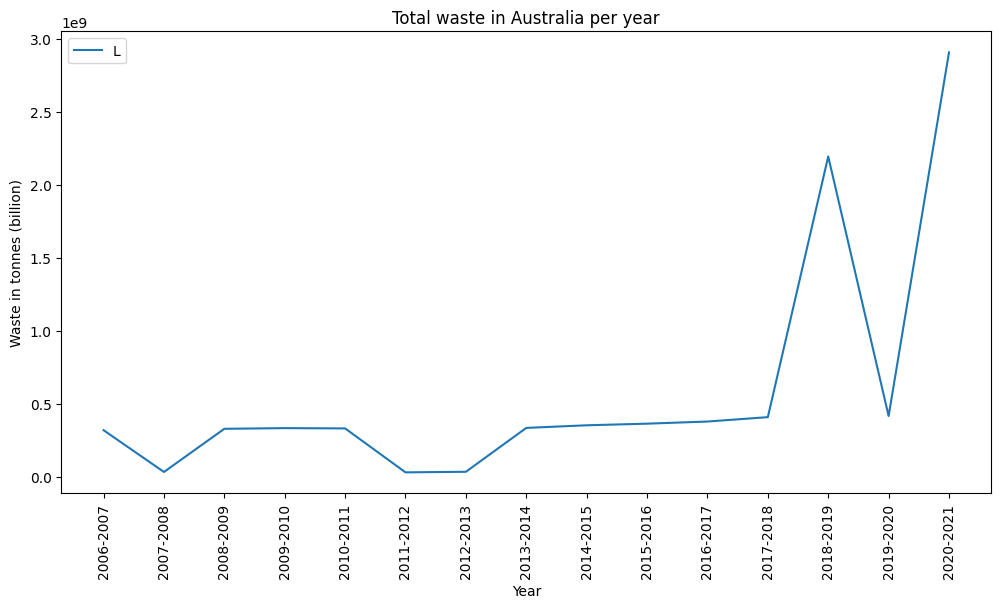

In [296]:
plt.figure(figsize=(12, 6))
plt.plot(unique_years, yearly_groups, label='My Line')
plt.xlabel('Year')
plt.ylabel('Waste in tonnes (billion)')
plt.title('Total waste in Australia per year')
plt.xticks(rotation=90)
plt.legend('Line')

In [297]:
category_groups = df.groupby(['Category'])['Tonnes'].sum()
unique_categories

array(['Biosolids', 'Building and demolition materials', 'Glass',
       'Hazardous wastes', 'Metals', 'Mining', 'Organics',
       'Paper & cardboard', 'Plastics',
       'Textiles, leather & rubber (excl. tyres)', 'Total',
       'Unclassified materials', 'Mineral processing',
       'Organic primary production', 'Organic processing', 'Ash'],
      dtype=object)

In [298]:
unique_categories[-2]

'Organic processing'

In [299]:
category_groups

Category
Ash                                          923155446
Biosolids                                    108914856
Building and demolition materials            692456933
Glass                                         43932041
Hazardous wastes                             540888999
Metals                                       195587544
Mining                                      4256571706
Organics                                     569575155
Paper & cardboard                            167226620
Plastics                                      64225627
Textiles, leather & rubber (excl. tyres)      22373302
Total                                       1159237420
Unclassified materials                        33837935
Name: Tonnes, dtype: int64

In [300]:
unique_categories = np.delete(unique_categories, [-2,-3,-4])

In [303]:
unique_categories = np.sort(unique_categories)

In [304]:
unique_categories

array(['Ash', 'Biosolids', 'Building and demolition materials', 'Glass',
       'Hazardous wastes', 'Metals', 'Mining', 'Organics',
       'Paper & cardboard', 'Plastics',
       'Textiles, leather & rubber (excl. tyres)', 'Total',
       'Unclassified materials'], dtype=object)

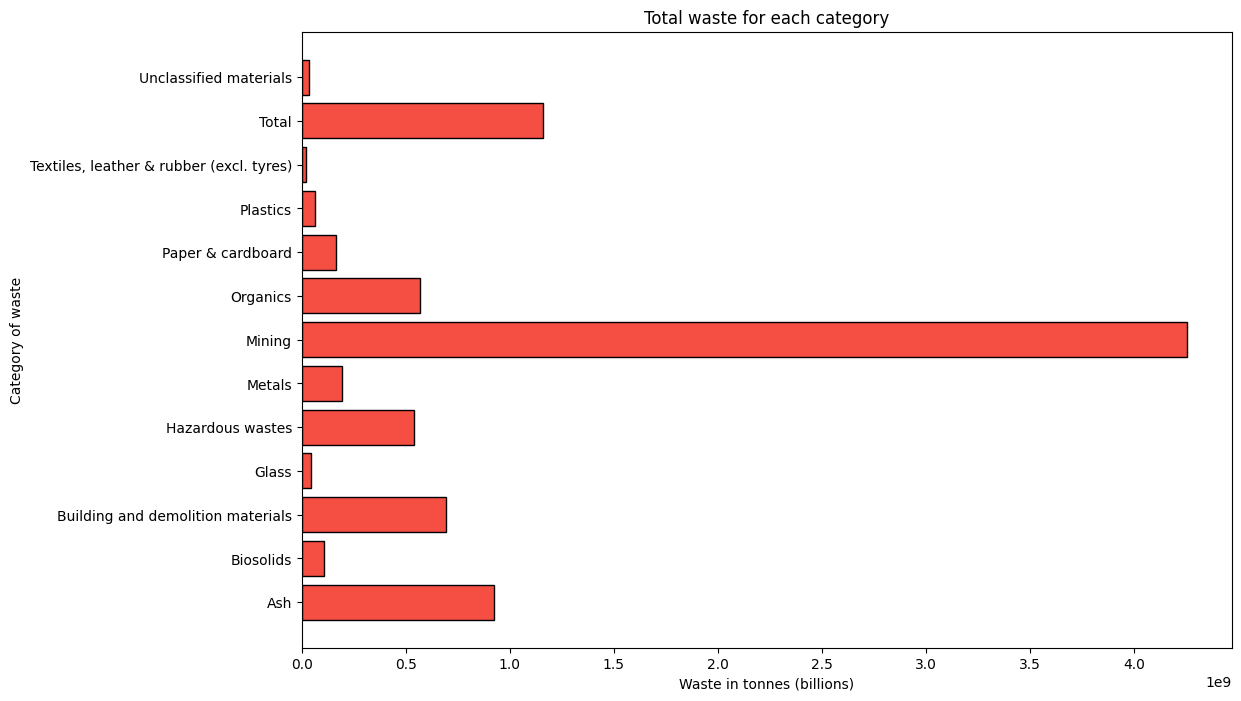

In [311]:
plt.figure(figsize=(12, 8))
plt.barh(unique_categories, category_groups, color = '#f54e42', edgecolor='black', linewidth=1)
plt.xlabel("Waste in tonnes (billions)")
plt.ylabel("Category of waste")
plt.title("Total waste for each category")
plt.show()

In [312]:
df.head()

,Year,Jurisdiction,Category,Type,Classification,Stream,Management,Fate,Tonnes,Core or non-core,Sub-stream,Cat. order,Cat. no.,Type order,Type no.,
0,2020-2021,ACT,Biosolids,Biosolids,Type,C&I,Other disposal,Disposal,20186,Core waste,03 C&I core,03 Organics,C3,14 Biosolids,T14,NaN
1,2020-2021,ACT,Biosolids,Biosolids,Type,C&I,Recycling,Recycling,0,Core waste,03 C&I core,03 Organics,C3,14 Biosolids,T14,NaN
2,2020-2021,ACT,Biosolids,Biosolids,Type,Total,Other disposal,Disposal,20186,Core waste,09 Total,03 Organics,C3,14 Biosolids,T14,NaN
3,2020-2021,ACT,Biosolids,Biosolids,Type,Total,Recycling,Recycling,0,Core waste,09 Total,03 Organics,C3,14 Biosolids,T14,NaN
4,2020-2021,ACT,Biosolids,NaN,Category,C&I,Other disposal,Disposal,20186,Core waste,03 C&I core,03 Organics,C3,NaN,NaN,NaN


In [320]:
waste_fate_totals = df.groupby(['Fate'])['Tonnes'].sum()
waste_fate_totals = waste_fate_totals.sort_values(ascending = False)
waste_fate_totals

Fate
Disposal             5580445835
Recycling            2486225379
Long-term storage     534786270
Energy recovery       153107630
Waste reuse            23331226
Unknown                   87244
Name: Tonnes, dtype: int64

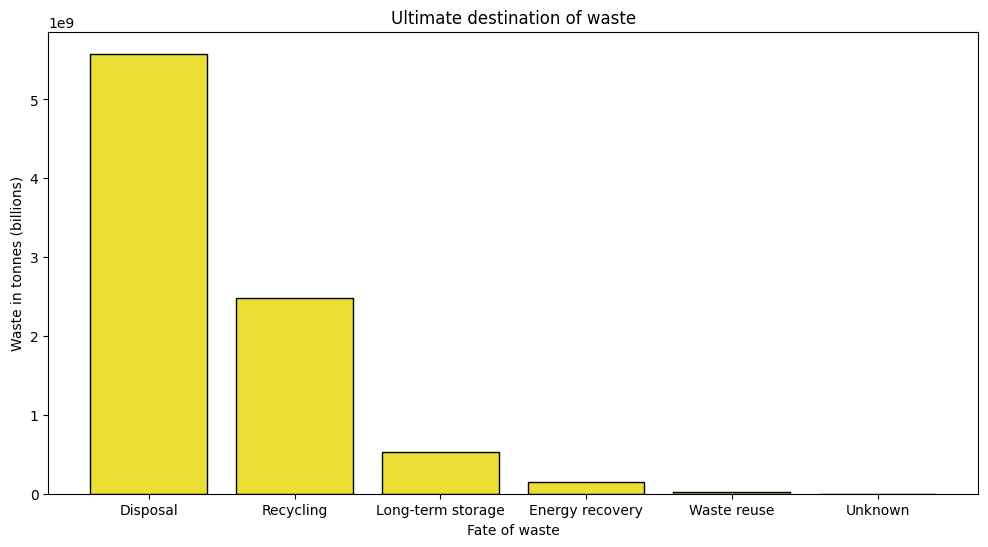

In [324]:
fates = ['Disposal', 'Recycling', 'Long-term storage', 'Energy recovery', 'Waste reuse', 'Unknown']
plt.figure(figsize=(12, 6))
plt.bar(fates, waste_fate_totals, color = '#ebde34', edgecolor='black', linewidth=1)
plt.xlabel("Fate of waste")
plt.ylabel("Waste in tonnes (billions)")
plt.title("Ultimate destination of waste")
plt.show()